In [1]:
import polygontorus_mcnp as pt
import numpy as np
import matplotlib.pyplot as plt

## Generation of base polygon
We will rotate this shape around the z-axis.

The points need to be in clockwise order. That's why we used numpy.flip()

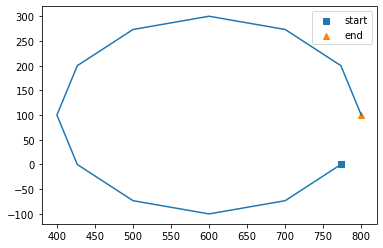

In [2]:
r0,z0 = (600,100)
R = 200
N = 12
rz_points = np.flip([[r0+R*np.cos(phi), z0+R*np.sin(phi)] for phi in np.linspace(0, 2*np.pi, N+1)[:-1]], axis=0)
plt.plot(rz_points[:,0], rz_points[:,1])
plt.scatter([rz_points[0,0]], [rz_points[0,1]], marker='s', label='start')
plt.scatter([rz_points[-1,0]], [rz_points[-1,1]], marker='^', label='end')
plt.legend()

## Generation of PolygonTorus objects

In [3]:
PT_1 = pt.PolygonTorus(rz_points=rz_points)
PT_2 = PT_1.Offset(10.0)
# OFFSETS CAN BE VERY SMALL
# CAUTION SHOULD BE USED WHEN MAKING LARGE NEGATIVE OFFSETS
# ==> THIS WILL LEAD TO VERTEX REMOVAL, BUT SHOULD STILL WORK

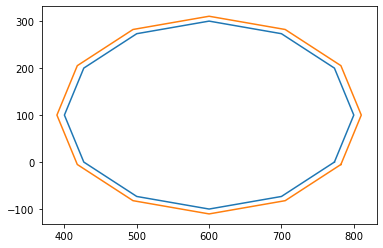

In [4]:
fig, ax = plt.subplots()
PT_1.polygon.PlotPolygon(mpl_axes=ax)
PT_2.polygon.PlotPolygon(mpl_axes=ax)

## Generation of regions and cells for MCNP

* Up to now it was the same as for openMC.
* Now there is a difference in region operations and cell creation.

In [5]:
max_chars = 75

plasma_region = "\n     ".join(
	pt.split_into_lines(PT_1.region_in, max_len=max_chars)
	)

wall_region = "\n     ".join(
	pt.split_into_lines(
		pt.Intersection([PT_1.region_out, PT_2.region_in]),
		max_len=max_chars
		)
	)

outside_region = "\n     ".join(
	pt.split_into_lines(PT_2.region_out, max_len=max_chars)
	)

In [6]:
MCNP_inp = open('simple.i', 'w')
MCNP_inp.write('c\n')
MCNP_inp.writelines(f'1 0 {plasma_region}\n') 
MCNP_inp.writelines(f'2 0 {wall_region}\n') 
MCNP_inp.writelines(f'3 0 {outside_region}\n') 
MCNP_inp.write('\n')
MCNP_inp.write(str(pt.Surfaces()))
MCNP_inp.write('\n\nmode n\n')
MCNP_inp.close()